In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Data loading**

In [96]:
df=pd.read_csv(r"C:\Users\SHREE\Desktop\Data-Science\matplotlib\netflix_titles.csv")
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3256,s3257,Movie,Iliza Shlesinger: Unveiled,Steve Paley,Iliza Shlesinger,United States,"November 19, 2019",2019,TV-MA,78 min,Stand-Up Comedy,"Here comes the bride, and she's got plenty to ..."
8241,s8242,Movie,The CEO,Kunle Afolayan,"Wale Ojo, Jimmy Jean-Louis, Hilda Dokubo, Nico...",Nigeria,"September 1, 2019",2016,TV-14,109 min,"Dramas, International Movies, Thrillers",A group of executives heads to a telecommunica...
4287,s4288,Movie,Andhadhun,Sriram Raghavan,"Tabu, Ayushmann Khurrana, Radhika Apte, Anil D...",India,"December 16, 2018",2018,TV-14,137 min,"Comedies, Dramas, International Movies",A visually impaired pianist’s world careens in...
3233,s3234,Movie,Pranaam,Sanjiv Jaiswal,"Rajeev Khandelwal, Samiksha Singh, S.M. Zaheer...",India,"November 25, 2019",2019,TV-14,117 min,"Action & Adventure, Dramas, International Movies",Aspiring to fulfill his father’s dream and bec...
197,s198,TV Show,I Heart Arlo,NaN,"Michael J. Woodard, Mary Lambert, Jonathan Van...",NaN,"August 27, 2021",2021,TV-Y7,1 Season,"Kids' TV, TV Comedies",It's a whole new world for Arlo and his one-of...


# **Data Understanding**

In [97]:
#How many rows and columns there are
df.shape

(8807, 12)

In [98]:
#What are the names of the columns 

df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [100]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [101]:
df.duplicated().sum()

0

In [102]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# **Data Cleaning**

In [103]:
df=df.dropna()

df.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# **Data Visualization**

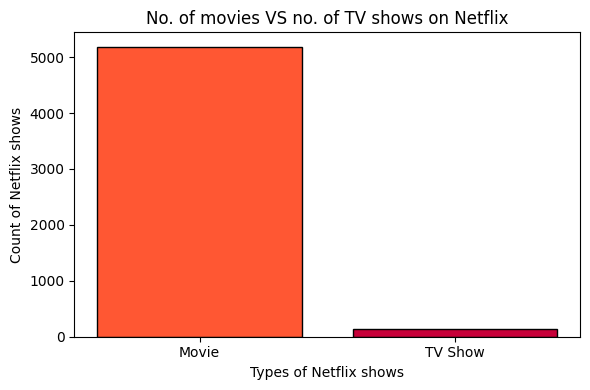

In [ ]:
#Creating a barplot of movie types

type_series=df['type'].value_counts() #this returns a pandas.core.series.Series wit hindex and values

type_index=type_series.index
type_values=type_series.values

plt.figure(figsize=(6,4))
plt.bar(type_index,type_values,
        color=['#FF5733','#C70039'],
        edgecolor='black'
        )
plt.xlabel("Types of Netflix shows")
plt.ylabel("Count of Netflix shows")
plt.title("No. of movies VS no. of TV shows on Netflix")

plt.tight_layout()
plt.savefig("No. of movies VS no. of TV shows on Netflix.png",dpi=300)
plt.show()

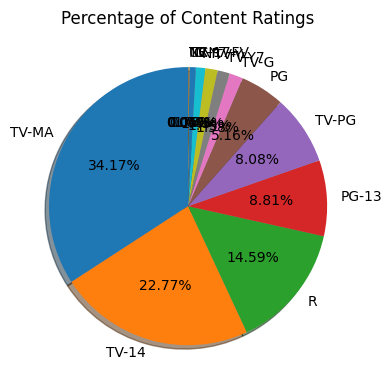

In [128]:
#Rating distributions

rating_counts=df['rating'].value_counts()

plt.figure(figsize=(6,4))
plt.pie(rating_counts,
        labels=rating_counts.index,
        autopct='%1.2f%%',
        shadow=True,
        startangle=90
        )
plt.title("Percentage of Content Ratings")

plt.tight_layout()
plt.savefig("Percentage of Content Ratings.png",dpi=300)
plt.show()

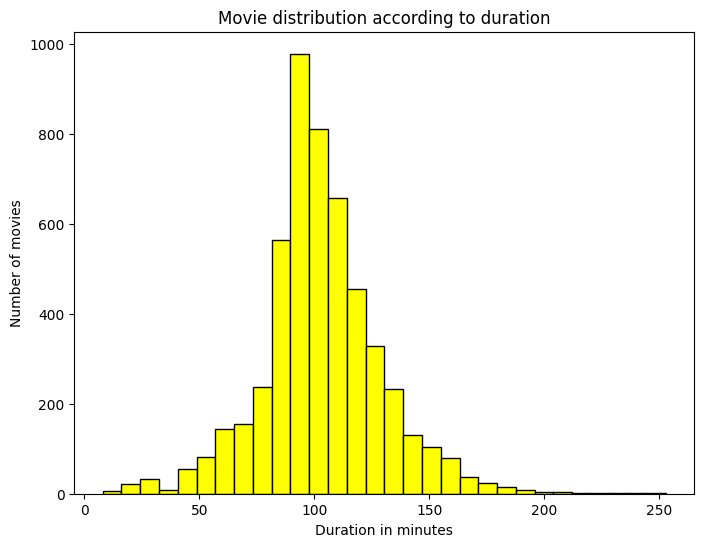

In [132]:
#Movie distribution using histograms

movie_df=df[df['type']=='Movie'].copy()

movie_df['duration_int']=movie_df['duration'].str.replace(" min","").astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'],
         bins=30,color='yellow',edgecolor='black')
plt.title("Movie distribution according to duration")
plt.xlabel("Duration in minutes")
plt.ylabel("Number of movies")
plt.savefig("Movie distribution according to duration",dpi=300)
plt.show()